In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,319785,319786,319787,319788,319789,319790,319791,319792,319793,319794
HeartDisease,No,No,No,No,No,Yes,No,No,No,No,...,No,Yes,No,No,No,Yes,No,No,No,No
BMI,16.6,20.34,26.58,24.21,23.71,28.87,21.63,31.64,26.45,40.69,...,31.93,33.2,36.54,23.38,22.22,27.41,29.84,24.24,32.81,46.56
Smoking,Yes,No,Yes,No,No,Yes,No,Yes,No,No,...,No,Yes,No,No,No,Yes,Yes,No,No,No
AlcoholDrinking,No,No,No,No,No,No,No,No,No,No,...,Yes,No,No,No,No,No,No,No,No,No
Stroke,No,Yes,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
PhysicalHealth,3.0,0.0,20.0,0.0,28.0,6.0,15.0,5.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
MentalHealth,30.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DiffWalking,No,No,No,No,Yes,Yes,No,Yes,No,Yes,...,No,No,No,No,No,Yes,No,No,No,No
Sex,Female,Female,Male,Female,Female,Female,Female,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female
AgeCategory,55-59,80 or older,65-69,75-79,40-44,75-79,70-74,80 or older,80 or older,65-69,...,65-69,60-64,30-34,60-64,18-24,60-64,35-39,45-49,25-29,80 or older


In [5]:
df1 = pd.DataFrame(df)

# Finding unique value counts for each column
for column in df.columns:
    unique_value_counts = df[column].value_counts()
    print(f'Value counts for {column}:\n{unique_value_counts}\n')

Value counts for HeartDisease:
No     292422
Yes     27373
Name: HeartDisease, dtype: int64

Value counts for BMI:
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64

Value counts for Smoking:
No     187887
Yes    131908
Name: Smoking, dtype: int64

Value counts for AlcoholDrinking:
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

Value counts for Stroke:
No     307726
Yes     12069
Name: Stroke, dtype: int64

Value counts for PhysicalHealth:
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0  

In [6]:
# Dictionary mapping old column names to new column names
column_mapping = {
    'PhysicalHealth': 'PoorPhysicalHealth(Days)',
    'MentalHealth': 'PoorMentalHealth(Days)'
}

# Rename columns using the mapping
df1.rename(columns=column_mapping, inplace=True)
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PoorPhysicalHealth(Days),PoorMentalHealth(Days),DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
df2 = df1.copy()

In [8]:
#df2.to_excel('final_hrt_dieses1.xlsx', index=False)

In [9]:
df3 = df2.drop(['DiffWalking','KidneyDisease','SkinCancer','Diabetic'], axis='columns')
df3.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PoorPhysicalHealth(Days),PoorMentalHealth(Days),Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma
0,No,16.60,Yes,No,No,3.0,30.0,Female,55-59,White,Yes,Very good,5.0,Yes
1,No,20.34,No,No,Yes,0.0,0.0,Female,80 or older,White,Yes,Very good,7.0,No
2,No,26.58,Yes,No,No,20.0,30.0,Male,65-69,White,Yes,Fair,8.0,Yes
3,No,24.21,No,No,No,0.0,0.0,Female,75-79,White,No,Good,6.0,No
4,No,23.71,No,No,No,28.0,0.0,Female,40-44,White,Yes,Very good,8.0,No


In [10]:
df3.isnull().sum()

HeartDisease                0
BMI                         0
Smoking                     0
AlcoholDrinking             0
Stroke                      0
PoorPhysicalHealth(Days)    0
PoorMentalHealth(Days)      0
Sex                         0
AgeCategory                 0
Race                        0
PhysicalActivity            0
GenHealth                   0
SleepTime                   0
Asthma                      0
dtype: int64

In [11]:
df3.describe()

,BMI,PoorPhysicalHealth(Days),PoorMentalHealth(Days),SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [52]:
#df3.to_csv('final_hrt_dieses.csv', index=False)

In [53]:
#df.to_excel('final_hrt_dieses.xlsx', index=False)

Pie Chart for Heart Disease Distribution:

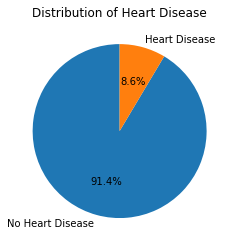

In [12]:

labels = ['No Heart Disease', 'Heart Disease']
sizes = [df3['HeartDisease'].value_counts()[0], df3['HeartDisease'].value_counts()[1]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Heart Disease')
plt.show()


Countplot for Smoking and Alcohol Drinking:

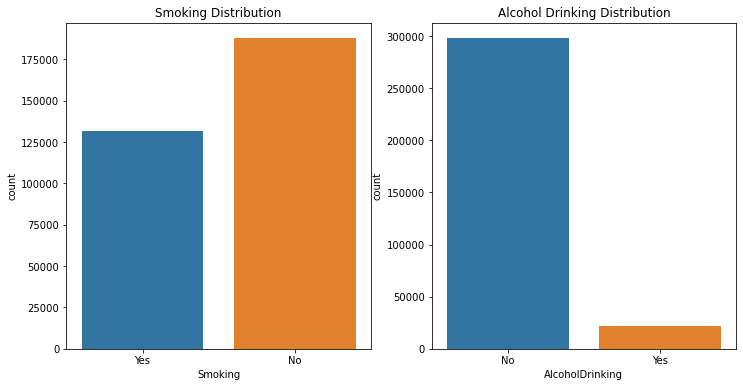

In [13]:
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Smoking', data=df3)
plt.title('Smoking Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='AlcoholDrinking', data=df3)
plt.title('Alcohol Drinking Distribution')

plt.show()

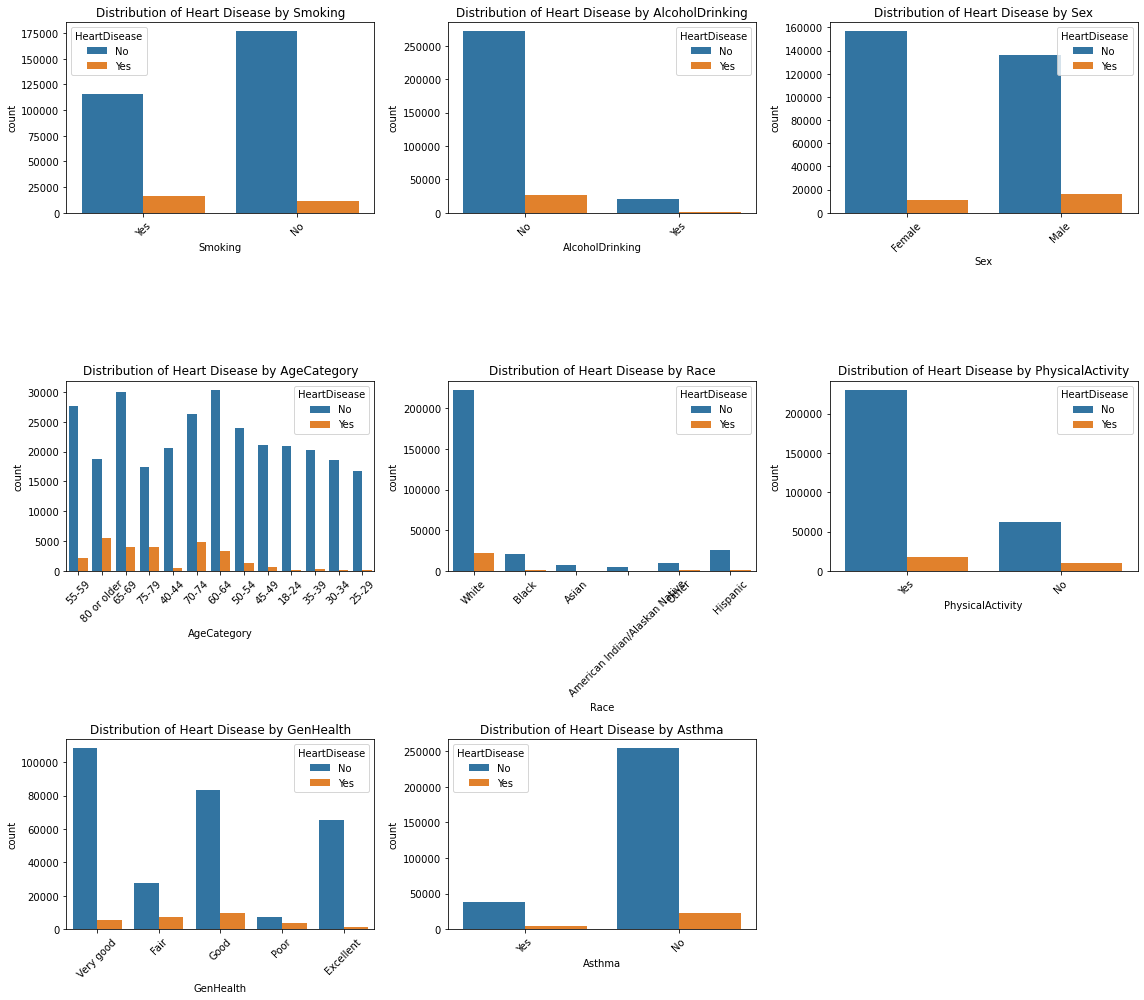

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory', 'Race', 'PhysicalActivity', 'GenHealth', 'Asthma']

plt.figure(figsize=(16, 14))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='HeartDisease', data=df3)
    plt.title(f'Distribution of Heart Disease by {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


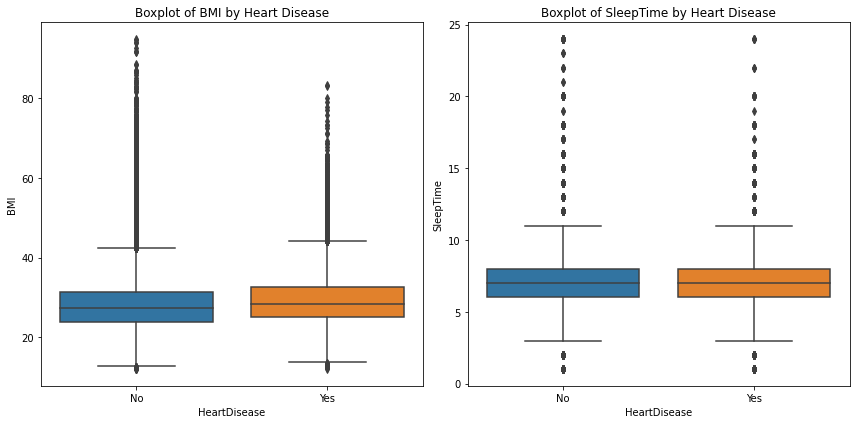

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['BMI', 'SleepTime']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='HeartDisease', y=feature, data=df3)
    plt.title(f'Boxplot of {feature} by Heart Disease')

plt.tight_layout()
plt.show()


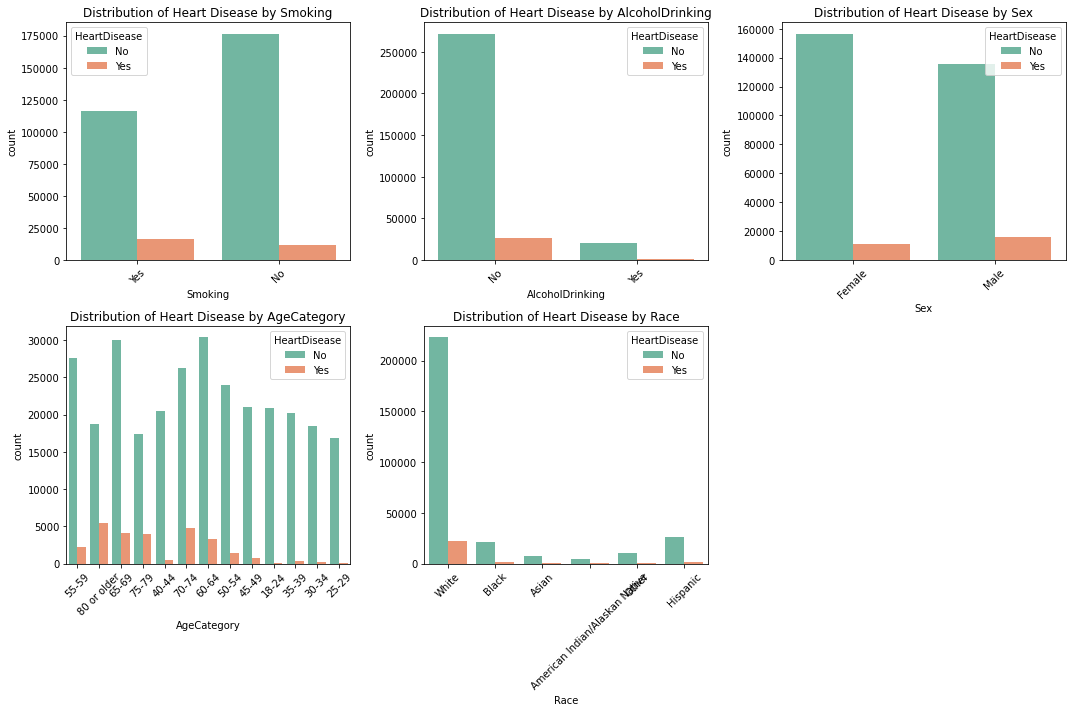

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory', 'Race']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='HeartDisease', data=df3, palette='Set2')
    plt.title(f'Distribution of Heart Disease by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [17]:
df3.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PoorPhysicalHealth(Days),PoorMentalHealth(Days),Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma
0,No,16.60,Yes,No,No,3.0,30.0,Female,55-59,White,Yes,Very good,5.0,Yes
1,No,20.34,No,No,Yes,0.0,0.0,Female,80 or older,White,Yes,Very good,7.0,No
2,No,26.58,Yes,No,No,20.0,30.0,Male,65-69,White,Yes,Fair,8.0,Yes
3,No,24.21,No,No,No,0.0,0.0,Female,75-79,White,No,Good,6.0,No
4,No,23.71,No,No,No,28.0,0.0,Female,40-44,White,Yes,Very good,8.0,No


# Model

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [19]:
df3.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PoorPhysicalHealth(Days),PoorMentalHealth(Days),Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma
0,No,16.60,Yes,No,No,3.0,30.0,Female,55-59,White,Yes,Very good,5.0,Yes
1,No,20.34,No,No,Yes,0.0,0.0,Female,80 or older,White,Yes,Very good,7.0,No
2,No,26.58,Yes,No,No,20.0,30.0,Male,65-69,White,Yes,Fair,8.0,Yes
3,No,24.21,No,No,No,0.0,0.0,Female,75-79,White,No,Good,6.0,No
4,No,23.71,No,No,No,28.0,0.0,Female,40-44,White,Yes,Very good,8.0,No


In [20]:
df3.isnull().sum()

HeartDisease                0
BMI                         0
Smoking                     0
AlcoholDrinking             0
Stroke                      0
PoorPhysicalHealth(Days)    0
PoorMentalHealth(Days)      0
Sex                         0
AgeCategory                 0
Race                        0
PhysicalActivity            0
GenHealth                   0
SleepTime                   0
Asthma                      0
dtype: int64

In [21]:
dff = df3[["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "Sex", "PhysicalActivity"]]
dff.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,Sex,PhysicalActivity
0,No,Yes,No,No,Female,Yes
1,No,No,No,Yes,Female,Yes
2,No,Yes,No,No,Male,Yes
3,No,No,No,No,Female,No
4,No,No,No,No,Female,Yes


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
Heart_Disease = LabelEncoder()
Smokingg = LabelEncoder()
Alcohol_Drinking = LabelEncoder()
Stokee = LabelEncoder()
Sexx = LabelEncoder()
Physical_Activity = LabelEncoder()

In [24]:
inputs = dff.copy()


inputs['Heart_Disease']=Heart_Disease.fit_transform(dff['HeartDisease'])
inputs['Smokingg']=Smokingg.fit_transform(dff['Smoking'])
inputs['Alcohol_Drinking']=Alcohol_Drinking.fit_transform(dff['AlcoholDrinking'])
inputs['Stokee']=Stokee.fit_transform(dff['Stroke'])
inputs['Sexx']=Sexx.fit_transform(dff['Sex'])
inputs['Physical_Activity']=Physical_Activity.fit_transform(dff['PhysicalActivity'])
inputs.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,Sex,PhysicalActivity,Heart_Disease,Smokingg,Alcohol_Drinking,Stokee,Sexx,Physical_Activity
0,No,Yes,No,No,Female,Yes,0,1,0,0,0,1
1,No,No,No,Yes,Female,Yes,0,0,0,1,0,1
2,No,Yes,No,No,Male,Yes,0,1,0,0,1,1
3,No,No,No,No,Female,No,0,0,0,0,0,0
4,No,No,No,No,Female,Yes,0,0,0,0,0,1


In [25]:
dff1 = inputs.drop(['HeartDisease','Smoking','AlcoholDrinking','Stroke','Sex','PhysicalActivity'], axis = 'columns')
dff1.head()

,Heart_Disease,Smokingg,Alcohol_Drinking,Stokee,Sexx,Physical_Activity
0,0,1,0,0,0,1
1,0,0,0,1,0,1
2,0,1,0,0,1,1
3,0,0,0,0,0,0
4,0,0,0,0,0,1


In [26]:
X = dff1.drop(['Heart_Disease'], axis = 'columns')
y = dff1['Heart_Disease']

In [27]:
X.head()

,Smokingg,Alcohol_Drinking,Stokee,Sexx,Physical_Activity
0,1,0,0,0,1
1,0,0,1,0,1
2,1,0,0,1,1
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Heart_Disease, dtype: int32

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [32]:
pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [34]:
RMC = RandomForestClassifier(n_estimators=100, random_state=42)
DTC = tree.DecisionTreeClassifier()
LR = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=2)
Xg = XGBClassifier()

In [35]:
m1 = get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)
m1

0.9144920964993198

In [36]:
m2 = get_score(LogisticRegression(), X_train, X_test, y_train, y_test)
m2

0.9145077315155021

In [37]:
m3 = get_score(tree.DecisionTreeClassifier(), X_train, X_test, y_train, y_test)
m3

0.9144920964993198

In [40]:
m4 = get_score(KNeighborsClassifier(), X_train, X_test, y_train, y_test)
m4

0.8002001282071327

In [39]:
m5 = get_score(XGBClassifier(), X_train, X_test, y_train, y_test)
m3

0.9144920964993198

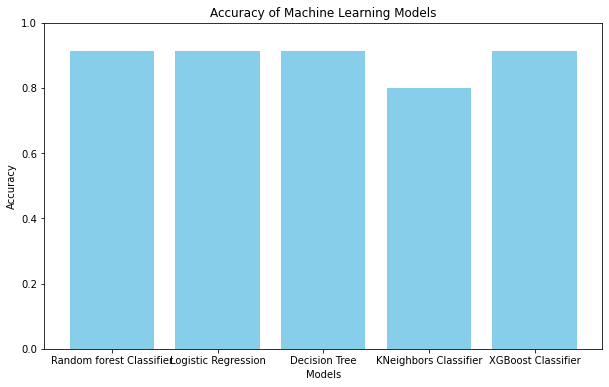

In [42]:
# List of model names
models = ['Random forest Classifier', 'Logistic Regression', 'Decision Tree', 'KNeighbors Classifier', 'XGBoost Classifier']

# List of accuracies for each model
accuracies = [m1, m2, m3, m4,m5]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
#plt.plot(models, accuracies, marker='o')
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 (assuming accuracy is a value between 0 and 1)
plt.show()

In [47]:
modell = LogisticRegression()
modell.fit(X_train, y_train)

LogisticRegression()

In [53]:
predicted = modell.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)
print(cm)

[[58352   113]
 [ 5355   139]]


<AxesSubplot:>

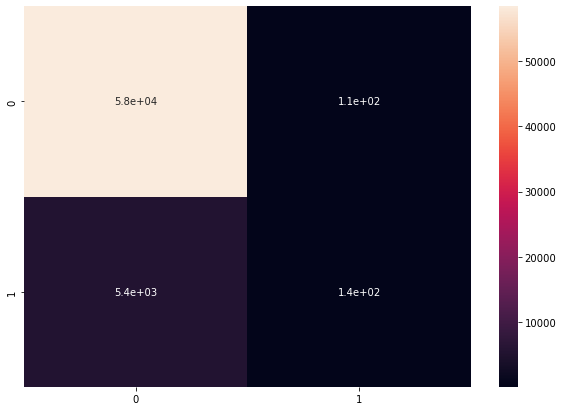

In [55]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)

In [ ]:
2